# Titanic 연습
 - baseline 만들기
 - 앙상블 Cross validation 개념 잡기

In [265]:
import pandas as pd
import numpy as np
import re 
from collections import Counter


import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns',13)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings(action='ignore')

## Load Data

In [554]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [549]:
print(train.shape)
print(train.isnull().sum())

temp

(891, 12)
PassengerId    0  
Survived       0  
Pclass         0  
Name           0  
Sex            0  
Age            177
SibSp          0  
Parch          0  
Ticket         0  
Fare           0  
Cabin          687
Embarked       2  
dtype: int64


NameError: name 'temp' is not defined

In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


NaN
(891, 12)
PassengerId      0  drop
Survived         0  target
Pclass           0  
Name             0  drop(==Sex)
Sex              0  encoding
Age            177  
SibSp            0  sibling husband wife
Parch            0  mother father daughter, stepson
Ticket           0  
Fare             0  
Cabin          687  
Embarked         2  
dtype: int64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [550]:
# object 형변환
obj=[]
for i in train.columns:
    if train[i].dtype == 'object':
        obj.append(i)

In [556]:
obj
# ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
# 1) Name -> called
train['Name'] = train['Name'].str.lower()

p = re.compile('([a-z]+)\.')
# p.findall(train['Name'][0])[0]) **호칭만 추출 ex- Mr.

# train['called'] = [p.findall(i) for i in train['Name']] **samething
called = train['Name'].apply(p.findall)

called2=[]
for i in called:
    called2.append(i[0])
train['called']=called2
train['called'].value_counts()
print(train['called'])

# train.drop(['Name','called'],1, inplace = True)

0      mr  
1      mrs 
2      miss
3      mrs 
4      mr  
       ..  
886    rev 
887    miss
888    miss
889    mr  
890    mr  
Name: called, Length: 891, dtype: object


 train['called'] 변수와 train['Sex']변수 같음 (남, 여 구분이 같다)

In [531]:
# 2) Sex
train['Gender']=[0 if i=='male' else 1 for i in train['Sex']]

In [532]:
train['Ticket'].head(30)

0     A/5 21171       
1     PC 17599        
2     STON/O2. 3101282
3     113803          
4     373450          
5     330877          
6     17463           
7     349909          
8     347742          
9     237736          
10    PP 9549         
11    113783          
12    A/5. 2151       
13    347082          
14    350406          
15    248706          
16    382652          
17    244373          
18    345763          
19    2649            
20    239865          
21    248698          
22    330923          
23    113788          
24    349909          
25    347077          
26    2631            
27    19950           
28    330959          
29    349216          
Name: Ticket, dtype: object

In [540]:
# 3) Ticket -> Tic
train['Tic']=[i[0] if len(i) == 0 else i[-1] for i in train['Ticket'].str.split()]
train[['Tic','Pclass']].tail(40)
print(train[['Tic','Embarked','Cabin']].head(30))

        Tic Embarked        Cabin
0   21171    S        0          
1   17599    C        C85        
2   3101282  S        0          
3   113803   S        C123       
4   373450   S        0          
5   330877   Q        0          
6   17463    S        E46        
7   349909   S        0          
8   347742   S        0          
9   237736   C        0          
10  9549     S        G6         
11  113783   S        C103       
12  2151     S        0          
13  347082   S        0          
14  350406   S        0          
15  248706   S        0          
16  382652   Q        0          
17  244373   S        0          
18  345763   S        0          
19  2649     C        0          
20  239865   S        0          
21  248698   S        D56        
22  330923   Q        0          
23  113788   S        A6         
24  349909   S        0          
25  347077   S        0          
26  2631     C        0          
27  19950    S        C23 C25 C27
28  330959   Q

In [216]:
# 4) Cabin
train['Cabin']=train['Cabin'].fillna('0')
# Counter([i[0] for i in train['Cabin']])

Counter({'0': 687,
         'C': 59,
         'E': 32,
         'G': 4,
         'D': 33,
         'A': 15,
         'B': 47,
         'F': 13,
         'T': 1})

In [226]:
# 5) Embarked
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

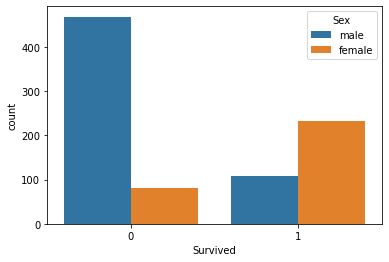

In [36]:
sns.countplot(data=train, x = 'Survived', hue = 'Sex')